In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [2]:
df = pd.read_csv('data.csv')
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [4]:
df.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [5]:
df['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

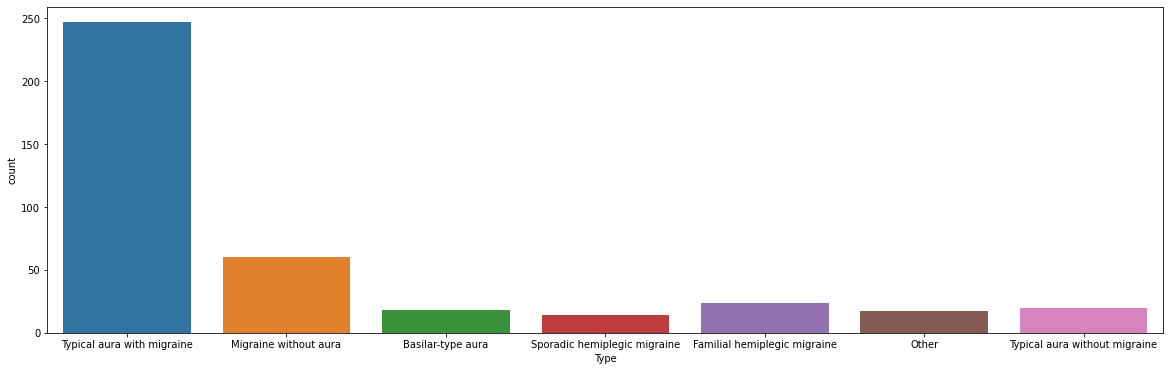

In [6]:
ax = plt.figure(figsize=(20,6))
sns.countplot(x=df['Type'])

In [7]:
df.head(3)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [8]:
for i, col in enumerate(df.columns):
    print(i+1, '  ', col)

1    Age
2    Duration
3    Frequency
4    Location
5    Character
6    Intensity
7    Nausea
8    Vomit
9    Phonophobia
10    Photophobia
11    Visual
12    Sensory
13    Dysphasia
14    Dysarthria
15    Vertigo
16    Tinnitus
17    Hypoacusis
18    Diplopia
19    Defect
20    Ataxia
21    Conscience
22    Paresthesia
23    DPF
24    Type


In [11]:
Location = {0:'None', 1:'Unilateral', 2:'Bilateral'}
Character = {0:'None', 1:'Thobbing', 2:'Constant'}
Intensity = {0:'None', 1:'Mild', 2:'Medium', 3:'Severe'}
yes_no = {0:'No', 1:'Yes'}

col_yes_no = ['Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
             'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF']

In [12]:
df['Location'] = df['Location'].replace(Location)
df['Character'] = df['Character'].replace(Character)
df['Intensity'] = df['Location'].replace(Intensity)
for i in range(len(col_yes_no)):
    df[col_yse_no[i]] = df[col_yse_no[i]].replace(yes_no)

In [13]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,No,No,No,No,No,No,No,No,No,Typical aura with migraine
1,50,3,5,Unilateral,Thobbing,Unilateral,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,Typical aura with migraine
2,53,2,1,Unilateral,Thobbing,Unilateral,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,Typical aura with migraine
3,45,3,5,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,Typical aura with migraine
4,53,1,1,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,No,No,No,No,No,No,No,No,Yes,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,Unilateral,Thobbing,Unilateral,Yes,Yes,Yes,Yes,...,Yes,No,No,Yes,No,No,No,No,Yes,Basilar-type aura
396,20,3,2,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,No,Yes,Yes,No,No,No,No,No,Yes,Basilar-type aura
397,28,3,2,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,Yes,No,No,No,Yes,No,No,No,Yes,Basilar-type aura
398,20,3,1,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,Yes,No,No,No,No,No,No,Yes,Yes,Basilar-type aura


In [14]:
type_ = {'Typical aura with migraine':0, 'Migraine without aura':1, 'Familial hemiplegic migraine':2,
         'Typical aura without migraine':3, 'Basilar-type aura':4, 'Other':5, 'Sporadic hemiplegic migraine':6}

In [15]:
df['Type'] = df['Type'].replace(type_)

In [16]:
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,No,No,No,No,No,No,No,No,No,0
1,50,3,5,Unilateral,Thobbing,Unilateral,Yes,Yes,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,0
2,53,2,1,Unilateral,Thobbing,Unilateral,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,0
3,45,3,5,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,Yes,No,No,No,No,No,No,No,No,0
4,53,1,1,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,No,No,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,Unilateral,Thobbing,Unilateral,Yes,Yes,Yes,Yes,...,Yes,No,No,Yes,No,No,No,No,Yes,4
396,20,3,2,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,No,Yes,Yes,No,No,No,No,No,Yes,4
397,28,3,2,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,Yes,No,No,No,Yes,No,No,No,Yes,4
398,20,3,1,Unilateral,Thobbing,Unilateral,Yes,No,Yes,Yes,...,Yes,No,No,No,No,No,No,Yes,Yes,4


In [17]:
categoricals = []
for col, col_type in df.dtypes.iteritems():
     if col_type == 'O':
        categoricals.append(col)
     else:
        df[col].fillna(0, inplace=True)

In [18]:
df_ohe = pd.get_dummies(df, columns=categoricals, dummy_na=True)
df_ohe

,Age,Duration,Frequency,Visual,Sensory,Type,Location_Bilateral,Location_None,Location_Unilateral,Location_nan,...,Ataxia_nan,Conscience_No,Conscience_Yes,Conscience_nan,Paresthesia_No,Paresthesia_Yes,Paresthesia_nan,DPF_No,DPF_Yes,DPF_nan
0,30,1,5,1,2,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,50,3,5,2,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,53,2,1,2,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,45,3,5,2,2,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,53,1,1,4,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,4,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
396,20,3,2,2,0,4,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
397,28,3,2,1,0,4,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
398,20,3,1,3,1,4,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


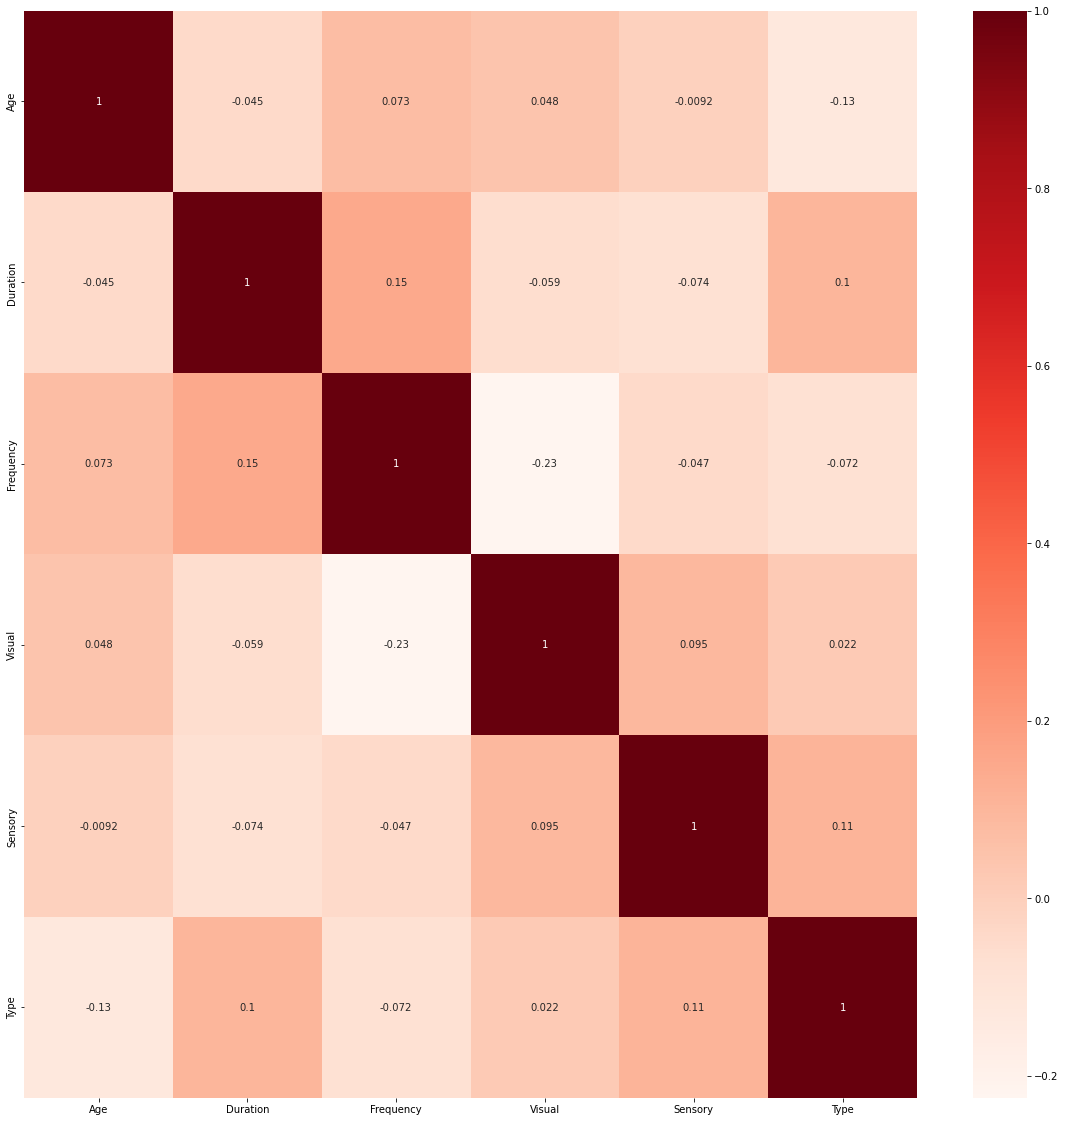

In [19]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
X = df_ohe.drop(columns='Type')
y = df_ohe['Type']

oversample = SMOTE()
new_X, new_y = oversample.fit_resample(X, y)

In [21]:
df_upsampled = pd.concat([new_X, new_y], axis=1)

In [22]:
df_upsampled['Type'].value_counts()

0    247
1    247
4    247
6    247
2    247
5    247
3    247
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

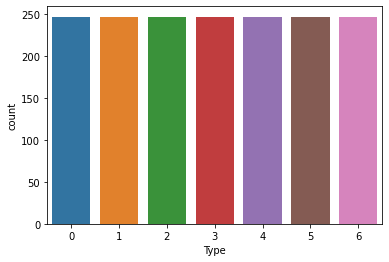

In [23]:
sns.countplot(x=df_upsampled['Type'])

In [25]:
X = df_upsampled.drop(columns='Type')
y = df_upsampled['Type']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle =True)

In [83]:
GBCModel = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.5, random_state=0)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9991735537190083
GBCModel Test Score is :  0.9922928709055877


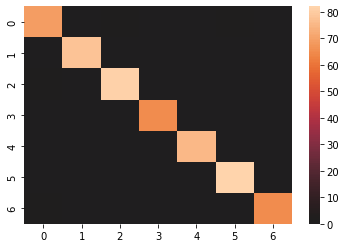

Confusion Matrix is
 [[69  0  1  0  0  1  0]
 [ 0 78  0  0  0  0  0]
 [ 1  0 81  0  0  0  0]
 [ 0  0  0 65  0  0  0]
 [ 0  0  0  0 75  0  0]
 [ 0  0  0  0  0 82  0]
 [ 1  0  0  0  0  0 65]]


In [84]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [85]:
y_pred = GBCModel.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       1.00      1.00      1.00        78
           2       0.99      0.99      0.99        82
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00        75
           5       0.99      1.00      0.99        82
           6       1.00      0.98      0.99        66

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519

0.9922928709055877


In [86]:
from joblib import Parallel, delayed
import joblib

joblib.dump(GBCModel, 'migraine_disease_model.pkl')

['migraine_disease_model.pkl']

In [87]:
# Saving the data columns from training
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_migraine_columns.pkl')
print("Models columns dumped!")

Models columns dumped!
